<a href="https://colab.research.google.com/github/radhikasethi2011/btechproj/blob/main/Data/full_pipeline_zip_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/radhikasethi2011/btechproj.git

Cloning into 'btechproj'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 212 (delta 89), reused 90 (delta 28), pack-reused 0
Receiving objects: 100% (212/212), 6.85 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
import random
random.seed(10)

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://jaspar.genereg.net/matrix/MA0003.4/

https://jaspar.genereg.net/sites/MA0003.4/

pipeline to prepare files: 


In [204]:
import random
import string
import numpy as np
from pathlib import Path
import pandas as pd

def get_num(a, b, x):
    """
    gets a unique number between a range (a,b), divisible by x
    input:  a - start inde
            b - end index
            x = random number should be divisible by x
    return:
        random number divisible by x
    """
    if not a % x:
        return random.choice(range(a, b, x))
    else:
        return random.choice(range(a + x - (a % x), b, x))

def motif_string():
    """
    generates a string of length (by get_num) of ACGT
    returns: string of equal ACGT
    """
    length = 288
    # print("random length: " , length)
    len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    letters_list = list(random.choice(letters))
    random.shuffle(letters_list)
    # print(" Random generated string with repetition:")
    str1 = ""
    return str1.join(letters_list)

def non_motif_string(length):
    """
    generates a string of length (by get_num) of ACGT
    returns: string 
    """
    # print("random length: " , length)
    #len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    nonmotiflist = []
    for i in range(length): 
      nonmotiflist.append(random.choice(letters))
    # print(" Random generated string with repetition:")
    str1 = ""
    return str1.join(nonmotiflist)

def add_motif():
    """
    adds a motif - string input, to output by non_motif_string
    returns: string consisting of a motif
    """
    motif = 'ATACGTTACCCG'
    result = list(motif_string())
    i = random.choice(range(len(result)))
    result.insert(i, motif)
    result = "".join(result)
    return result,i


def write_to_df(length,var): #to generate non motif background files
  l=[]
  for i1 in range(int(length)):
    l1=[]
    i=-5
    result= non_motif_string(var)
    seq = "seq_" + str(i1 + 1) + "_peak"
    a='0'      
    l1 = ["A",seq,str(i), result,a]
    l.append(list(l1))
  df = pd.DataFrame(l,columns=['FoldID',	'EventID',	'start_index',	'seq',	'Bound']) 
  return df

#write_to_file(1000)

#def write_to_df(length, var,name):


In [205]:
df_nonmotif_train = write_to_df(1000,314)
df_mixed_motif = write_to_df(1000,300)
df_mixed_nonmotif = write_to_df(1000,314)
df_motif_train = write_to_df(1000,300)

In [206]:
df_nonmotif_train.head()

,FoldID,EventID,start_index,seq,Bound
0,A,seq_1_peak,-5,GTAATATGCACTAGGGACACTGTACGGACAGTCGCGGTATATTACA...,0
1,A,seq_2_peak,-5,TGACACTTTCAGAACGACTGCCTGATTTTGAGCCCAAGTATGCATC...,0
2,A,seq_3_peak,-5,CGCGCGGAAGATGGAATATGTTTGCTCGAAACCATCGCACGCGCGT...,0
3,A,seq_4_peak,-5,AGCACAATTTACTAAAACGGTCCCGCTTTCTACGCAGGGTGAGATC...,0
4,A,seq_5_peak,-5,TGGGTGACTCCAGACTGTTACTCTCACAGCTCCAATTGGTAGGTCA...,0


need to print lines 1 to 4 (0 is heading) of JASPAR file


In [207]:
import numpy as np
from pathlib import Path


def read_pfm_jaspar(filepath_):
  with open(Path(filepath_)) as f:
    lines = f.readlines()

  a = []
  for i in range(1,5,1):
    b = list(lines[i].split()[2:-1])
    a.append(b)
  a = np.array(a,dtype=float)
  return a

pfm = read_pfm_jaspar('/content/MA0138.2.jaspar')
pfm

array([[ 211.,   58.,   76., 1452.,   34.,  122., 1575.,    3.,   35.,
         913.,  219.,   39.,   20., 1406.,   13., 1574.,   42.,  205.,
         366.,  213.,  179.],
       [ 174.,  269., 1366.,   30.,   44.,  978.,    7., 1586., 1481.,
         201.,  375.,    7.,    5.,  112., 1280.,    9.,   13., 1007.,
          31.,  933., 1114.],
       [ 366.,  146.,   50.,   94., 1516.,  323.,   12.,   12.,   20.,
         162.,  124., 1551., 1577.,   34.,  233.,    7., 1530.,  183.,
         688.,  319.,   37.],
       [ 840., 1124.,  105.,   26.,   10.,  182.,   12.,    5.,   70.,
         329.,  886.,    7.,    2.,   51.,   74.,   10.,    9.,  198.,
         507.,  125.,  260.]])

In [208]:
print(pfm.shape)
print(type(pfm))

(4, 21)
<class 'numpy.ndarray'>


In [209]:
import copy
ppm = copy.deepcopy(pfm)
print(ppm)

[[ 211.   58.   76. 1452.   34.  122. 1575.    3.   35.  913.  219.   39.
    20. 1406.   13. 1574.   42.  205.  366.  213.  179.]
 [ 174.  269. 1366.   30.   44.  978.    7. 1586. 1481.  201.  375.    7.
     5.  112. 1280.    9.   13. 1007.   31.  933. 1114.]
 [ 366.  146.   50.   94. 1516.  323.   12.   12.   20.  162.  124. 1551.
  1577.   34.  233.    7. 1530.  183.  688.  319.   37.]
 [ 840. 1124.  105.   26.   10.  182.   12.    5.   70.  329.  886.    7.
     2.   51.   74.   10.    9.  198.  507.  125.  260.]]


In [210]:
def convert_pfm_to_ppm(pfm):
  for i in range(pfm.shape[1]):
    sum = 0
    for j in range(pfm.shape[0]):
      sum+= pfm[j][i] 
    for j in range(pfm.shape[0]):
      prob = float(pfm[j][i]/sum)
      ppm[j][i] = float(prob)
  return(ppm)
  

In [211]:
p1=['A','C','G','T']
str1=''
def ppm_to_motif(ppm):
  motif = []
  mot=[]
  for i in range(ppm.shape[1]):
    arr = []
    for j in range(ppm.shape[0]):
      arr.append(float(ppm[j][i]))
    choice = np.random.choice(p1,p=arr) #motif is generated here
    mot.append(choice)
  
  return (''.join(mot))
  #return choice

In [212]:
ppm = convert_pfm_to_ppm(pfm)
print(ppm)


[[0.13262099 0.0363181  0.04758923 0.90636704 0.02119701 0.07601246
  0.98069738 0.001868   0.02179328 0.56884735 0.13653367 0.02431421
  0.01246883 0.87710543 0.008125   0.98375    0.02634881 0.12868801
  0.2298995  0.13396226 0.11257862]
 [0.10936518 0.16844083 0.85535379 0.01872659 0.02743142 0.60934579
  0.00435866 0.9875467  0.92216687 0.12523364 0.23379052 0.00436409
  0.00311721 0.069869   0.8        0.005625   0.00815558 0.63214062
  0.01947236 0.58679245 0.70062893]
 [0.230044   0.09142142 0.0313087  0.05867665 0.94513716 0.20124611
  0.00747198 0.00747198 0.0124533  0.10093458 0.07730673 0.96695761
  0.98316708 0.02121023 0.145625   0.004375   0.95984944 0.11487759
  0.4321608  0.20062893 0.02327044]
 [0.52796983 0.70381966 0.06574828 0.01622971 0.00623441 0.11339564
  0.00747198 0.00311333 0.04358655 0.20498442 0.55236908 0.00436409
  0.00124688 0.03181535 0.04625    0.00625    0.00564617 0.12429379
  0.31846734 0.07861635 0.16352201]]


In [213]:
motif= ppm_to_motif(ppm)
print(motif)

ATCAGCACCTCGGACAGCAAC


In [214]:
for i in range(50):
  motif=ppm_to_motif(ppm)
  print(motif)

GTCAGAACCTTGGACAGAAAA
TTCAGCACCTCGGACAGCTCC
TTCAGGACCTTGGACAGCTCC
ATCAGCACCACGGTTAGTGGT
CTCAGCACCTTGGACAGCTCT
ATCAGCACCCAGGACAGCGCC
ATAAGCACCATGGACAGCTCC
TTCGGGACCAAGGAGAGGGGC
CTTACCAGCATGGACAACTCC
TTAAGCACCAAGGAGAGAGCT
CTCAGAACCGTGGCCAGTGGC
CACTGTACCGGGGACAATTCC
GTCAGCACCATGGAGAGGGGC
GTTAGGACCGTGGCCAGCGCC
TACAGCACCATGGCCAGCGCA
TTCAGCACCGTAGACAGGGCC
TTCAGCACCATGGAGAGCTGT
TTCAGCACCATGGACAGGACC
TTCAGTACTACGGCCAGCAGC
GCCAGTACGTTGGAGAGCGGC
GTCAGCACCAAGGACAGCGCT
TACAGCACCATGGACAGCGAT
TTCAGCACCCTGGACAGCACC
TTCAGCACCATGGACAGCAGC
GCCAGCACCAAGGAGAGCGGT
TCCAAGACCAGGGACAGTGAT
TCCGGCACCAGGGACAGCGCT
GCCAGGACCTAGGACAGCTCC
TCCGGCACCTGGGACAGTTGT
TGCAGCACCTTGGAAAGCGGA
GTCAGCACTAAGGACAGCTCC
TTCAGCACCTCGGACAGCTCC
GTTAGCACCGTGGCCAGCTCT
GTCAGCACCAGGGAGAGCTAC
TGCAGCACCATGGAAAGCTGC
CTCAGCACCGAGGGGAGCGCC
GTCAGCACCATGGCCAGGTCA
CCCAGAACCACGGACAGAAGT
TCAAGCACCTCGGACAGTAGC
TTCAGTACCATGGAGAGAACG
GACAGCACCCAGGACAGAAGA
GTCAGCACCATGGACAGTTCC
TTCAGCACCATAGAGAGGACT
TTCAGCACCACGGACAGGTTC
TTCAGCACCTCGGACAGCAGC
ACCAGCACCA

implanting motifs in 2 files - df_mixed_motif , df_motif_train 

In [215]:
print(list(df_motif_train['seq']))

['GTCTAGCCAGATGAGAAGAGAGGCAGGAAGACGCAAGGTGTCACTCTCCTACCCGGGGTACGGATGCTAACCGGGTCGATCTTGACCGTTCTCCCTTGACTCAAAACTTTAAACAGATTGAACTTAGTTGTTTTGTTCGAACCTTGACTCTGTCACTGAAAATGATTAGGAGAGGCGGTGTTGCCAGCTGTGACCCCGGTCCTCAGGGAGTGCATTGGCATAACGGTAGACCGAACGCCATGGCATGGTAAGACCGTACATGTGGTTTGTTCTTAAATTATTTCTGGGGATCTATTTACG', 'TTCCAAACCGTCTGATTTCGGCTCATTACACCGGGGCAACTCTCGGGCGGTACCTCAGCCACCTCACTGGAGAGCAGCTCCCTAAGCCCTATGTTTTGAGATATTGTCCAGACCTGAGGCTTTCATATAATCTCGCCATGGACCGGAATTGTGGGGTGGCTCTTCGTTCATGCCAGCCGACCTGTCGTAGCGCCTTCGAGACGGTCAGAATGCTGTCCAGAGCTGATCATTTATAACGTTAGAGGTACTGGCCAGGATGATGACGCACACAACCGATTATACTAGGCCCAGCACGTGCGG', 'TATGTGGAGTCTTCTGAAACAGATTGTCGGTATTACCTGGATTAAGAGCCAACGATCGGCTCCGCGTGTTAACGCTACTACGTTTCGTTGATTGTGCAGCGACTAGATAACGCATTATTCAGCGGCTCAAAACAAGTGCGAATCTGCCAGCTATTAGAGTTTTCGCCGATCACTGGAGATTGCCGGTTATTTGCGGCTCCGAAGAACTTACTACGTTGCAATTGGCTAGATGGGGGAGACTACATGACGACTCACAAGAACCTTAACTATGAATGCGGTGCGTATAAACAGCATGATACA', 'TATGTTGAGAACCGGGTATGTTTTGAAGCGATTTTTAATAAAAACGGTGCTAATTGATGTCTCGCGGAGACTCTTAACGCACTTCT

In [216]:
def non_motif_create(df1,df2): #to implant a  motif in a non motif file -> 1. motif file, 2. mixed file 
  mot=[]
  l1=[]
  l2=[]
  for i in range(0,len(df1)):
    motif = ppm_to_motif(ppm)
    mot.append(motif)
    index=random.randint(0,len(df1[i])-1) #0 to 300 
    l1.append(index)
    df1[i]=df1[i][:index] + str(motif) + df1[i][index:]
    
    index2=np.random.choice(len(df2[i]))
    l2.append(index2)
    df2[i]=df2[i][:index2] + str(motif) + df2[i][index2:]
    #print(index)
    #print(df1[i])
    #print(mot)
  return l1,l2,df1,df2,mot #l1, l2 to store the index

In [217]:
l1,l2,df_motif_train['seq'],df_mixed_motif['seq'],mot=non_motif_create(list(df_motif_train['seq']),list(df_mixed_motif['seq']))

In [218]:
len(l1)

1000

In [219]:
len(df_motif_train['seq'][0])

321

In [220]:
df_motif_train['start_index'] = l1
df_mixed_motif['start_index'] = l2
df_motif_train['Bound']=df_motif_train['Bound'].astype('int32').replace(0,1)
df_mixed_motif['Bound']=df_mixed_motif['Bound'].astype('int32').replace(0,1)

In [221]:
df_mixed_motif['Bound'].dtype
df_mixed_motif.head()

,FoldID,EventID,start_index,seq,Bound
0,A,seq_1_peak,32,CGGTGGTTGCAGAATATACCGATCGGCAGACGTTCAGCACCTCGGA...,1
1,A,seq_2_peak,174,AACTGCCTGTTACAAAGGCTGCTATGCCGCACTGGTCGAACAGGTC...,1
2,A,seq_3_peak,108,GCGCCTAACGAATAAGAACAGCAAGCGCATGCGCGATCTCTCGCTG...,1
3,A,seq_4_peak,1,TCTCAGCACCTTGGACAGCAGCAGCAAGCAGGAGAAGAAGTTGATG...,1
4,A,seq_5_peak,79,TGCAGGAGCTACGACACACTTGTGGTTCTACATTCGGGCCTAAGGA...,1


In [222]:
df_motif_train.head()

,FoldID,EventID,start_index,seq,Bound
0,A,seq_1_peak,270,GTCTAGCCAGATGAGAAGAGAGGCAGGAAGACGCAAGGTGTCACTC...,1
1,A,seq_2_peak,73,TTCCAAACCGTCTGATTTCGGCTCATTACACCGGGGCAACTCTCGG...,1
2,A,seq_3_peak,29,TATGTGGAGTCTTCTGAAACAGATTGTCGGCCAGCACCTTGGACAG...,1
3,A,seq_4_peak,293,TATGTTGAGAACCGGGTATGTTTTGAAGCGATTTTTAATAAAAACG...,1
4,A,seq_5_peak,43,CAGCAGCCTGCAATCTACATTAACAATTATACCACCCCTCCACTTC...,1


Creating mixed file using df_mixed_motif and df_mixed_nonmotif

In [223]:
df_mixed_motif=df_mixed_motif.append(df_mixed_nonmotif,ignore_index=True)

In [224]:
df_mixed=df_mixed_motif.sample(frac=1).reset_index(drop=True)
df_mixed

,FoldID,EventID,start_index,seq,Bound
0,A,seq_320_peak,26,AGAAGTGGGCGCAGGGTCGGCGCTCAATCAGTACCACGGACAGAGA...,1
1,A,seq_22_peak,120,TGGAACCGCTCGCCTCACGATCCAGCACGGAGCGTTGTAACAGTAG...,1
2,A,seq_281_peak,46,TAATTAATAACAGCATATGACCTGTTATCAAACTTTTATAGGTCTA...,1
3,A,seq_803_peak,138,TGATTGTACTAGCCATAGCCAGGTAGATTGCCCACGTGCTTTGATG...,1
4,A,seq_35_peak,283,GCGTGACACCCGATCTGAGCCGGCCATAGTTCCCGCCTATTACGAA...,1
...,...,...,...,...,...
1995,A,seq_879_peak,-5,CTCACTGAGCGACTCACTGCTACGATTGGGGCCTAACGAATACACC...,0
1996,A,seq_106_peak,56,AACACGTTTCTAATATGGCGCACCGTATGAACTAATTAAGTGCCAC...,1
1997,A,seq_950_peak,-5,GTCCGATTTCAGGCTTATGGGATTTAGCTAGTGAGTATGCGTGGAA...,0
1998,A,seq_727_peak,-5,AGCTCCAAAATTGCTAAATATTGTAGGTCTAATAATGTCGACACGG...,0


Saving all 3 files : df_mixed, df_motif_train, df_nonmotif_train

In [225]:
df_mixed.to_csv('/content/drive/MyDrive/BTech Proj/Data/MA0138.2/mixed.txt',index=None, sep='\t')
df_motif_train.to_csv('/content/drive/MyDrive/BTech Proj/Data/MA0138.2/motif.txt',index=None, sep='\t')
df_nonmotif_train.to_csv('/content/drive/MyDrive/BTech Proj/Data/MA0138.2/nonmotif.txt',index=None, sep='\t')

now running through markov models 


In [226]:
import math
a = math.log(1)
a

0.0

In [227]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import pandas as pd 


def markov_model_motif(df1):
    """
    for a second degree motif markov model 
    returns dict2, dict3: count of the appearance of eg: A->C and eg: AC->T occuring
    """
    dict2, dict3 = {}, {}
    for j in range(len(df1)):
      seq = df1[j]
      for i in range(len(seq)-var): #dict2
        if seq[i:i+var] not in dict2: 
          dict2[seq[i:i+var]] = 1
        else: 
          dict2[seq[i:i+var]] += 1

      for i in range(len(seq)): #dict3
        if seq[i:i+var+1] not in dict3: 
          dict3[seq[i:i+var+1]] = 1
        else: 
          dict3[seq[i:i+var+1]] += 1

    #print('dict2: ', dict2)
    #print('dict3: ', dict3)
      
    return dict2, dict3


def motif_score(dict2, dict3, seq):
    """
    returns the score of th markov model motif 
    """
    s = seq
    import math

    a=0
    sum = 0
    score = 1
    for i in range(0, len(s)):
      if s[i : i + var+1] not in dict3:
        #print("HELLOOOOOOOOOOOO", s[i : i + var+1])
        dict3[s[i : i + var+1]] = 1
      score = score * dict3[s[i : i + var+1]]
    #print('dict2-',dict2)
    #print('dict3-',dict3)
    return math.log(score),dict2,dict3


def train(df,df2,df4):
    # df1 = df['seq']
   
    dict2, dict3 = markov_model_motif(df)  # markov model for the motif.txt file
    # print("####################################################")
    
    dict2_non, dict3_non = markov_model_motif(        df2    )  # markov model for the non motif file
    # now, testing each sequence and predicting their class using the 2 dictionaries

    for i in range(len(df4)):
        list1 = []
        list2 = []
    for i in range(len(df4)):
        seq = df4["seq"][i]
        """
        1. score it using ddict3
        2. score it using dict3_non 
        3. whichever score higher, give value of that class 
        4. add seq, class to a list, append that list to the df 
        5. write this file 
        """

        score_motif,dict5,dict6 = motif_score(dict2, dict3, seq)
        score_nonmotif,dict7,dict8 = motif_score(dict2_non, dict3_non, seq)
        #print('for sequence: ', seq, 'score motif: ', score_motif, 'score_nonmotif: ', score_nonmotif)
        list1.append(score_motif-score_nonmotif)
        if score_motif > score_nonmotif:
            list2.append(1)
        else:
            list2.append(0)
    df4["predicted"] = list2
    df4["log odd score"] = list1
    #print('dict2 - motif: ', dict5)
    #print('dict3 - motif : ', dict6)
    print(df4)
    

def accuracy():
    y_true = df4["Bound"]
    y_pred = df4["predicted"]
    return accuracy_score(y_true, y_pred)

colnames2 = ["FoldID", "EventID", "start_index", "seq", "Bound"]
colnames = ["FoldID", "EventID", "seq", "Bound"]

In [228]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import pylab as pl
from sklearn import metrics

def acc_score(df4):
  y_true=df4['Bound']
  y_pred=df4['predicted']
  accuracy_score(y_true, y_pred)
  return y_true, y_pred



def confusion_mat(y_true,y_pred):
  array3=confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(5,5))   
  sns.heatmap(array3, annot=True,fmt='.2f',cmap="PuBu")
  plt.title('Confusion Matrix',fontsize=15,color='red')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()


def auc_calculate(df4):
  y_log_score = df4['log odd score']
  precision, recall, thresholds = precision_recall_curve(y_true, y_log_score)
  area = auc(recall, precision)
  print("Area Under Curve")
  print(area)

  pl.clf()
  pl.plot(recall, precision, label='Precision-Recall curve')
  pl.xlabel('Recall')
  pl.ylabel('Precision')
  pl.ylim([0.0, 1.0])
  pl.xlim([0.0, 1.0])
  pl.title('Precision-Recall example: AUC=%0.2f' % area)
  pl.legend(loc="lower left")
  pl.show()

def roc_calculate(df4):
  y_log_score = df4['log odd score']
  fpr,tpr, thresh = metrics.roc_curve(y_true, y_log_score)
  auc = metrics.auc(fpr, tpr)
  print("AUC:", auc)

  plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid()
  plt.legend()
  plt.show()




Step:  2
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       0.822283
1         A  seq_753_peak           -5  ...     0          0      -1.350126
2         A  seq_711_peak           -5  ...     0          0      -1.178585
3         A  seq_781_peak           -5  ...     0          0      -0.303835
4         A  seq_657_peak           84  ...     1          0      -1.439919
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -0.548544
1996      A  seq_645_peak           -5  ...     0          1       2.241221
1997      A  seq_569_peak           -5  ...     0          0      -1.553974
1998      A  seq_116_peak           -5  ...     0          1       0.479629
1999      A  seq_155_peak           -5  ...     0          1       0.300489

[2000 rows x 7 columns]
0.5895


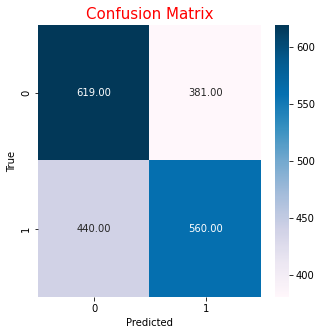

Area Under Curve
0.6329387117398295


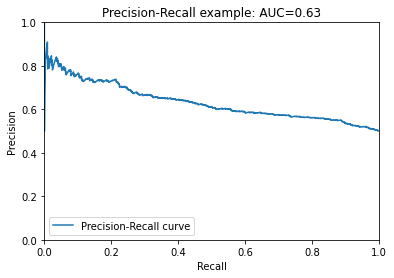

########################################################################################
Step:  3
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          0      -0.263562
1         A  seq_753_peak           -5  ...     0          0      -2.318769
2         A  seq_711_peak           -5  ...     0          0      -1.938964
3         A  seq_781_peak           -5  ...     0          0      -2.128771
4         A  seq_657_peak           84  ...     1          0      -3.455298
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -1.754650
1996      A  seq_645_peak           -5  ...     0          1       4.333931
1997      A  seq_569_peak           -5  ...     0          0      -1.223369
1998      A  seq_116_peak           -5  ...     0          1       0.452741
1999      A  seq_155_peak           -5  ...     0          0      

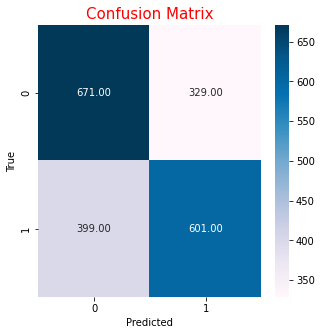

Area Under Curve
0.6879099218801009


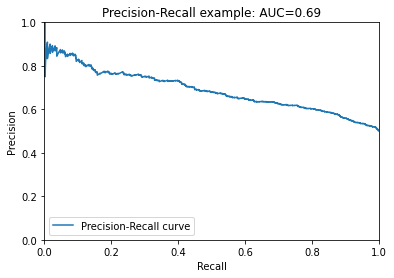

########################################################################################
Step:  4
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          0      -1.702436
1         A  seq_753_peak           -5  ...     0          0      -1.552115
2         A  seq_711_peak           -5  ...     0          0      -1.668007
3         A  seq_781_peak           -5  ...     0          0      -2.382634
4         A  seq_657_peak           84  ...     1          0      -5.327398
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -2.250978
1996      A  seq_645_peak           -5  ...     0          1       6.454638
1997      A  seq_569_peak           -5  ...     0          0      -1.247905
1998      A  seq_116_peak           -5  ...     0          0      -0.282944
1999      A  seq_155_peak           -5  ...     0          0      

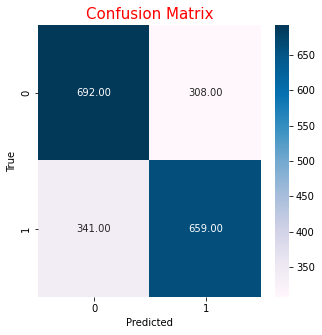

Area Under Curve
0.7497717925909746


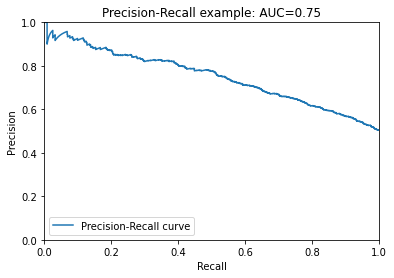

########################################################################################
Step:  5
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          0      -3.154135
1         A  seq_753_peak           -5  ...     0          0      -0.829812
2         A  seq_711_peak           -5  ...     0          0      -1.853345
3         A  seq_781_peak           -5  ...     0          0      -3.791182
4         A  seq_657_peak           84  ...     1          0      -5.627523
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -1.657303
1996      A  seq_645_peak           -5  ...     0          1       9.492957
1997      A  seq_569_peak           -5  ...     0          1       0.165596
1998      A  seq_116_peak           -5  ...     0          0      -2.735794
1999      A  seq_155_peak           -5  ...     0          0      

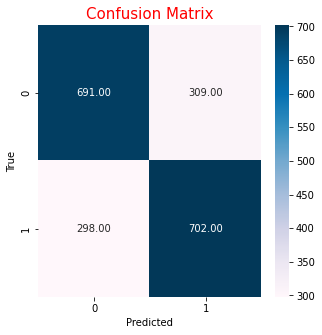

Area Under Curve
0.7874926752194139


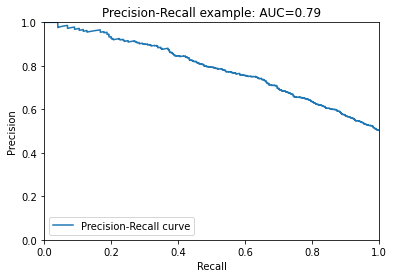

########################################################################################
Step:  6
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          0      -2.423903
1         A  seq_753_peak           -5  ...     0          0      -3.650777
2         A  seq_711_peak           -5  ...     0          0      -8.939886
3         A  seq_781_peak           -5  ...     0          0      -7.534848
4         A  seq_657_peak           84  ...     1          0      -6.994526
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -6.253644
1996      A  seq_645_peak           -5  ...     0          1       9.969718
1997      A  seq_569_peak           -5  ...     0          1       4.539940
1998      A  seq_116_peak           -5  ...     0          1       0.192521
1999      A  seq_155_peak           -5  ...     0          1      

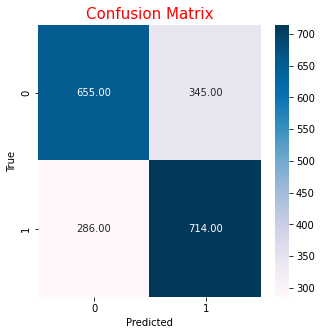

Area Under Curve
0.762441850867793


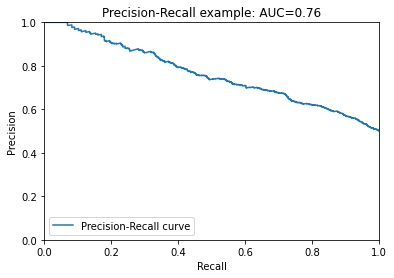

########################################################################################
Step:  7
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       7.433943
1         A  seq_753_peak           -5  ...     0          0      -1.739938
2         A  seq_711_peak           -5  ...     0          0     -12.033765
3         A  seq_781_peak           -5  ...     0          0      -8.542140
4         A  seq_657_peak           84  ...     1          0     -23.593753
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -1.262619
1996      A  seq_645_peak           -5  ...     0          0      -3.038905
1997      A  seq_569_peak           -5  ...     0          1       4.905165
1998      A  seq_116_peak           -5  ...     0          0     -16.413871
1999      A  seq_155_peak           -5  ...     0          1      

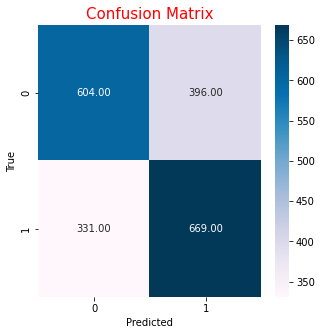

Area Under Curve
0.6913670582074481


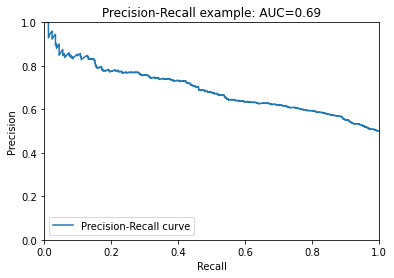

########################################################################################
Step:  8
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       5.199636
1         A  seq_753_peak           -5  ...     0          1       3.051744
2         A  seq_711_peak           -5  ...     0          0      -8.240853
3         A  seq_781_peak           -5  ...     0          0     -11.709424
4         A  seq_657_peak           84  ...     1          0      -7.008596
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -5.713996
1996      A  seq_645_peak           -5  ...     0          1      10.920817
1997      A  seq_569_peak           -5  ...     0          1       8.167643
1998      A  seq_116_peak           -5  ...     0          0      -0.658753
1999      A  seq_155_peak           -5  ...     0          1      

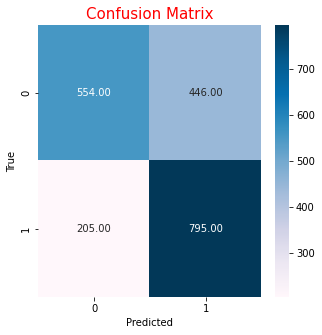

Area Under Curve
0.7656304561139612


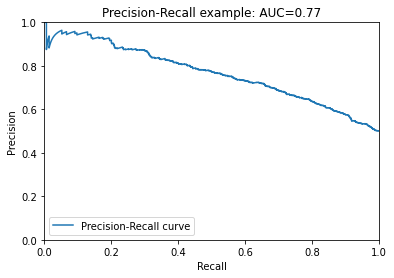

########################################################################################
Step:  9
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       5.762577
1         A  seq_753_peak           -5  ...     0          0      -1.894124
2         A  seq_711_peak           -5  ...     0          1       0.024797
3         A  seq_781_peak           -5  ...     0          1       4.270228
4         A  seq_657_peak           84  ...     1          1       6.016147
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          1       0.548046
1996      A  seq_645_peak           -5  ...     0          1       5.138601
1997      A  seq_569_peak           -5  ...     0          0      -0.738138
1998      A  seq_116_peak           -5  ...     0          1       1.983630
1999      A  seq_155_peak           -5  ...     0          1      

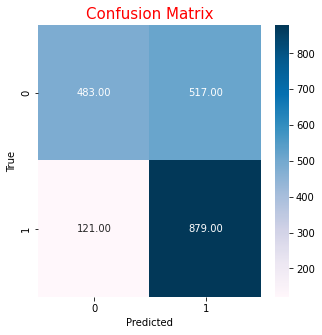

Area Under Curve
0.8691806915142901


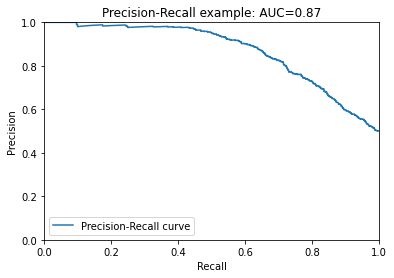

########################################################################################
Step:  10
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       2.466740
1         A  seq_753_peak           -5  ...     0          0      -0.965410
2         A  seq_711_peak           -5  ...     0          1       1.816557
3         A  seq_781_peak           -5  ...     0          1       0.686710
4         A  seq_657_peak           84  ...     1          1       0.353186
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          0      -0.956032
1996      A  seq_645_peak           -5  ...     0          1       2.366012
1997      A  seq_569_peak           -5  ...     0          0      -0.280557
1998      A  seq_116_peak           -5  ...     0          1       1.865847
1999      A  seq_155_peak           -5  ...     0          1     

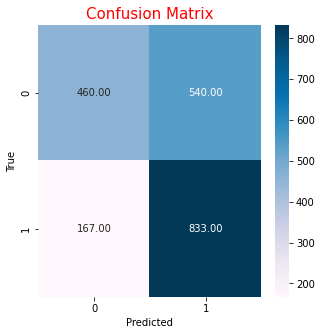

Area Under Curve
0.8450822063583701


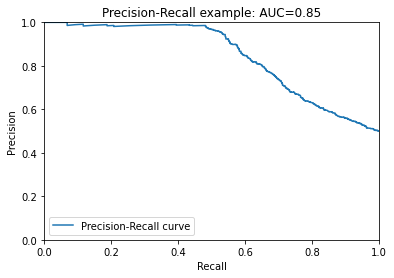

########################################################################################
Step:  11
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       1.080446
1         A  seq_753_peak           -5  ...     0          0      -0.965410
2         A  seq_711_peak           -5  ...     0          1       1.816557
3         A  seq_781_peak           -5  ...     0          1       0.686710
4         A  seq_657_peak           84  ...     1          0      -0.339961
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          1       0.430263
1996      A  seq_645_peak           -5  ...     0          1       0.979718
1997      A  seq_569_peak           -5  ...     0          0      -0.280557
1998      A  seq_116_peak           -5  ...     0          1       0.479553
1999      A  seq_155_peak           -5  ...     0          1     

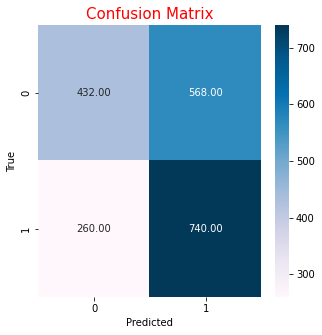

Area Under Curve
0.7631715553076132


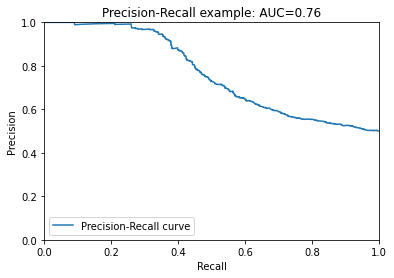

########################################################################################
Step:  12
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       1.080446
1         A  seq_753_peak           -5  ...     0          0      -0.965410
2         A  seq_711_peak           -5  ...     0          1       1.816557
3         A  seq_781_peak           -5  ...     0          1       0.686710
4         A  seq_657_peak           84  ...     1          0      -0.339961
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          1       0.430263
1996      A  seq_645_peak           -5  ...     0          1       0.286571
1997      A  seq_569_peak           -5  ...     0          0      -0.280557
1998      A  seq_116_peak           -5  ...     0          1       0.479553
1999      A  seq_155_peak           -5  ...     0          0     

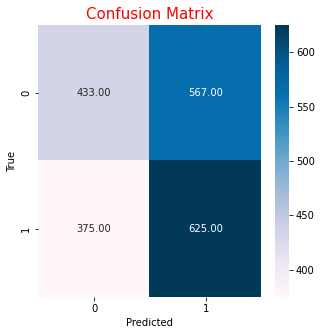

Area Under Curve
0.6131229887128984


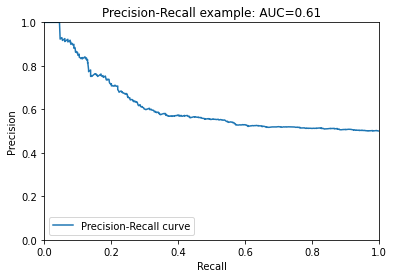

########################################################################################
Step:  13
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       1.080446
1         A  seq_753_peak           -5  ...     0          0      -0.965410
2         A  seq_711_peak           -5  ...     0          1       1.816557
3         A  seq_781_peak           -5  ...     0          1       0.686710
4         A  seq_657_peak           84  ...     1          0      -0.339961
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          1       0.430263
1996      A  seq_645_peak           -5  ...     0          1       0.286571
1997      A  seq_569_peak           -5  ...     0          0      -0.280557
1998      A  seq_116_peak           -5  ...     0          1       0.479553
1999      A  seq_155_peak           -5  ...     0          0     

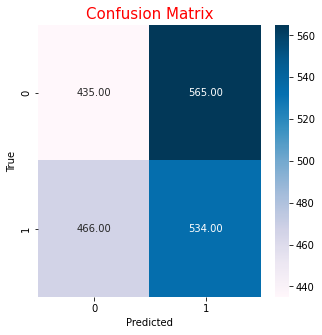

Area Under Curve
0.5081659932634897


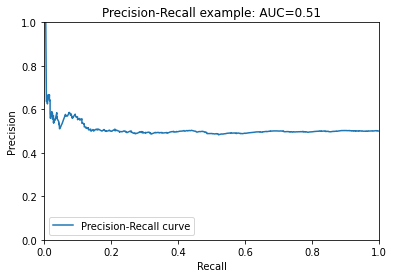

########################################################################################
Step:  14
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       1.080446
1         A  seq_753_peak           -5  ...     0          0      -0.965410
2         A  seq_711_peak           -5  ...     0          1       1.816557
3         A  seq_781_peak           -5  ...     0          1       0.686710
4         A  seq_657_peak           84  ...     1          0      -0.339961
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          1       0.430263
1996      A  seq_645_peak           -5  ...     0          1       0.286571
1997      A  seq_569_peak           -5  ...     0          0      -0.280557
1998      A  seq_116_peak           -5  ...     0          1       0.479553
1999      A  seq_155_peak           -5  ...     0          0     

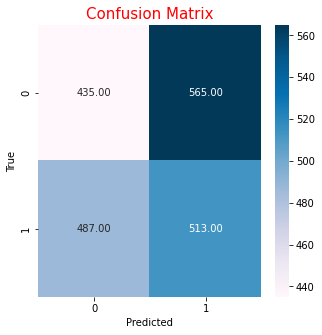

Area Under Curve
0.48606670241796485


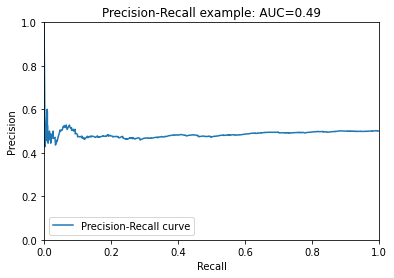

########################################################################################
Step:  15
     FoldID       EventID  start_index  ... Bound  predicted  log odd score
0         A   seq_56_peak           -5  ...     0          1       1.080446
1         A  seq_753_peak           -5  ...     0          0      -0.965410
2         A  seq_711_peak           -5  ...     0          1       1.816557
3         A  seq_781_peak           -5  ...     0          1       0.686710
4         A  seq_657_peak           84  ...     1          0      -0.339961
...     ...           ...          ...  ...   ...        ...            ...
1995      A  seq_655_peak           -5  ...     0          1       0.430263
1996      A  seq_645_peak           -5  ...     0          1       0.286571
1997      A  seq_569_peak           -5  ...     0          0      -0.280557
1998      A  seq_116_peak           -5  ...     0          1       0.479553
1999      A  seq_155_peak           -5  ...     0          0     

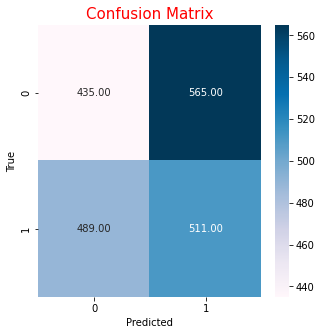

Area Under Curve
0.48457861283159687


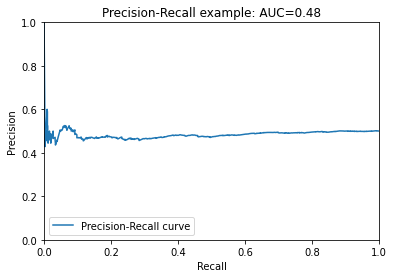

########################################################################################


In [229]:
#df =  motif 
#df2 = non motif
#df4 = mixed test file
df = pd.read_csv("/content/motif.txt", delimiter="\t")

df2 = pd.read_csv("/content/nonmotif.txt", delimiter="\t")
df1 = list(df["seq"])
df3 = list(df2["seq"])
#df1.reset_index(drop=True, inplace=True)
#df3.reset_index(drop=True, inplace=True)
df4 = pd.read_csv("/content/mixed.txt", delimiter="\t")

#df4=df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df4 = df4.sample(frac=1).reset_index(drop=True)

for i in range(2,16,1):
  print("Step: ", i)
  var = i
  
  #df4.reset_index(drop=True, inplace=True)
  train(df1,df3,df4)
  acc = accuracy()
  print(acc)

  y_true,y_pred = acc_score(df4)
  confusion_mat(y_true,y_pred)
  auc_calculate(df4)
  print("########################################################################################")


In [58]:
#df1[0]

In [ ]:
df4

,FoldID,EventID,start_index,seq,Bound,predicted,log odd score
0,A,seq_249_peak,233,ACAGCGTTTATCCGCAAGATCAGGTAGGAATTGCTTGGCCAACACC...,1,0,-2.490876
1,A,seq_744_peak,0,ACGGCCTCAGGGTTTAGTTATTTACGACGTTAACTTAATGCTATAT...,1,0,0.000000
2,A,seq_564_peak,227,CCGCGCACCAAAGGACGGGGAACAGAGCACTGCTCTCGGTGAATGC...,1,0,0.000000
3,A,seq_349_peak,126,CGCCATTTTAACGAATCCTACGAAGCGTCCGTTAATACATAGAGAA...,1,0,0.000000
4,A,seq_752_peak,140,TGACTACGAGCGCCCCTCATAAGACAAACCCTTCGGGGAAACCTAC...,1,0,0.000000
...,...,...,...,...,...,...,...
995,A,seq_231_peak,228,TGCCTGGCATGCTAGGTAACAATATGCCCCCTTATGAAAAGCGGCG...,1,0,0.000000
996,A,seq_862_peak,247,AGCTGAAATAGACCCTCTGGATCATCGCTTCAGTTCTTTTTCTCCT...,1,0,0.000000
997,A,seq_793_peak,223,CTGTCCTTAATCTGGGCCCCCCTTAGTTCGAGCACAGTAATGTCGT...,1,0,0.000000
998,A,seq_339_peak,129,TGCAAGCATCGGCTTAGTAACGTGCGATAAACCTTTAACAGCAGGA...,1,0,0.000000


In [ ]:
df4.dtypes

FoldID            object
EventID           object
start_index        int64
seq               object
Bound              int64
predicted          int64
log odd score    float64
dtype: object

In [ ]:
df4['predicted'].unique()

array([0])

In [ ]:
#from sklearn.metrics import classification_report

#target_names = ['nonmotif', 'motif']
#print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
#from sklearn.metrics import f1_score
#f1_score(y_true, y_pred, average=None)

In [ ]:
#f1_score(y_true, y_pred, average='weighted')

In [ ]:
#area = auc(recall, precision)
#print("Area Under Curve")
#print(area)

In [ ]:
#print(thresh)

In [ ]:
l = ['A','C','G','T']
for i in range(20):
  ans = random.choice(l)
  print(ans)

C
C
A
G
A
G
A
T
T
A
G
A
T
C
G
T
C
A
T
A


In [ ]:
def non_motif_string():
    """
    generates a string of length (by get_num) of ACGT
    returns: string 
    """
    length = 314
    # print("random length: " , length)
    #len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    nonmotiflist = []
    for i in range(length): 
      nonmotiflist.append(random.choice(letters))
    # print(" Random generated string with repetition:")
    str1 = ""
    #print(str1.join(nonmotiflist))
    return str1.join(nonmotiflist)

non = non_motif_string()
print(non)

TAGGCTAGTACCACAAGGCTACCGATCAAACGTTCTTCGAATTCTCGAACATAAAGGGGTCGGGTCACTGCCTTGGCTAGTCCTGCCAGGGCCACCCATTTTATTGCCGGCGTGGCAGGGAAGGCGCTTGGTTGCTTGTGTCGTGGTTAGTAATTAGTGTGCACGTCTACAAATGCGCTTAAGGAAGTTACTGAGTATAGGCGGCTCCGTGATATGAGATGAGATCTATGATTCACGTGTAGCATTAAACGTTAGGTCTGACTCACTAGTGTGGGTAACCCCCGTAATGCGAGTGGAATCCAACGGAGGACATT
